In [1]:
#%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d as Axes3D



#constants
G=4*np.pi**2

#vy=6.27776068

#ecc=0.25
#vy=7.02483055

#ecc=0.5
#vy=7.69530476

#ecc=0.75
#vy=8.31187496

#ecc=0.9
vy=8.66077398

ti=0
tf=1e3

#initial conditions 
x=np.array([0,1])
y=np.array([0,0])
z=np.array([0,0])
vx=np.array([0,0])
vy=np.array([0,vy])
vz=np.array([0,0])
mass=np.array([1,3.00273e-6])


#number of objects
m=len(mass)


#time grid
dt=0.01
t=np.arange(ti,tf+dt,dt)

#number of points
N=len(t)

#saving coordinates and velocity as six consecutive vectors
q=np.ones((m,6*N))



Total_Energy=np.zeros(N)
Total_L=np.zeros(N)
#initial conditions
q[:,:6] = np.array((x,y,z,vx,vy,vz)).transpose()


def calcular_fuerzas(r,mass):
    f=np.zeros_like(r)
    N=len(mass)
    
    for i in range(N):
        for j in range(N):
            if i == j:
                pass
            else:
                xij=r[i,:]-r[j,:]
                f[i,:]+=-G*mass[j]*xij/(np.linalg.norm(xij)**3)
    return f

#energy
def total_energy(q,mass):
    m=len(mass)
    KE=0.
    PE=0.
    
    for i in range(m):
        KE+=mass[i]*(np.dot(q[i,3:],q[i,3:]))/2
        for j in range(i):
            xij=q[i,:3]-q[j,:3]
            PE+=-G*mass[i]*mass[j]/np.linalg.norm(xij)
        
    
    return KE+PE

#angular momentum
def total_l(q,mass):
    m=len(mass)
    L=0.
    
    for i in range(m):
        r, v=q[i,:3],q[i,3:]
        L+=np.linalg.norm(np.cross(r,mass[i]*v))
    return L


def time(q,mass,dt):
    aux=np.zeros_like(q)
    #advance in time
    F1=calcular_fuerzas(q[:,:3],mass)
    q[:,3:]+=dt*F1/2.
    q[:,:3]+=dt*q[:,3:]
    F2=calcular_fuerzas(q[:,:3],mass)
    q[:,3:]+=dt*F2/2
    return q
    

#time evolution
for i in range(1,N):
    
    q[:,6*(i):6*(i+1)]=time(q[:,6*(i-1):6*i],mass,dt)

    
#Energy     
for i in range(N):
    Total_Energy[i]=total_energy(q[:,6*(i):6*(i+1)],mass)
#L   
for i in range(N):
    Total_L[i]=total_l(q[:,6*(i):6*(i+1)],mass)
    

#indexes to access the coordinates and velocities
indx_x=[i for i in range(6*N) if i%6==0]
indx_y=[i for i in range(6*N) if i%6==1]
indx_z=[i for i in range(6*N) if i%6==2]
indx_vx=[i for i in range(6*N) if i%6==3]
indx_vy=[i for i in range(6*N) if i%6==4]
indx_vz=[i for i in range(6*N) if i%6==5]



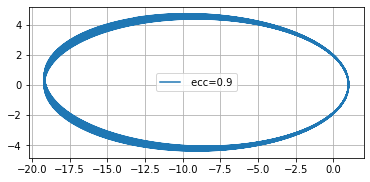

In [2]:
#save ecc
plt.plot(q[1,indx_x],q[1,indx_y],label=f" ecc={0.9}")
plt.gca().set_aspect('equal', adjustable='box')
plt.legend()
plt.grid()

#plt.savefig(f"lpf_{0.9}ecc.jpeg")
plt.show()

In [22]:


#initial conditions 
x=np.array([0,1])
y=np.array([0,0])
z=np.array([0,0])
vx=np.array([0,0])
vy=np.array([0,6.27776068])
vz=np.array([0,0])
mass=np.array([1,3.00273e-6])
q0= np.array((x,y,z,vx,vy,vz)).transpose()
def ecc(q,mass,v,e0=0):
    #set vy velocity
    q0[1,4]=v
    E=total_energy(q,mass)
    L=total_L(q,mass)
    miu=(mass[0]*mass[1])/(mass[0]+mass[1])
    e=np.sqrt(1+(2*E*L**2)/(miu*(G*mass[0]*mass[1])**2))
    return e-e0

In [3]:
#absolute change
def delta_a(b):
    delta=np.abs(b[1:]-b[:-1]/b[1:])
    return delta

delta_E=delta_a(Total_Energy)
delta_L=delta_a(Total_L)

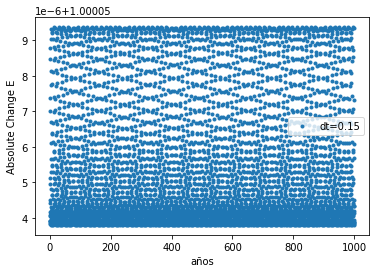

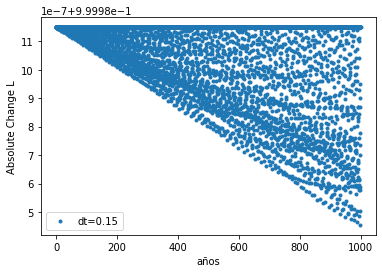

In [47]:
#save changes
plt.figure()
plt.scatter(t[1:],delta_E ,marker=".",label=f"dt={dt}")
plt.xlabel("años")
plt.ylabel("Absolute Change E")
plt.legend()
plt.savefig(f"lpf_{dt}_E.jpeg")
plt.show()
plt.scatter(t[1:], delta_L,marker=".",label=f"dt={dt}")
plt.xlabel("años")
plt.ylabel("Absolute Change L")
plt.legend()
plt.savefig(f"lpf_{dt}_L.jpeg")
plt.show()